**TODO**
1. Написать когда по 4 сигналам прогнозируем 5ый. 

In [1]:
import sys
sys.path.insert(1, '../')

In [2]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from importlib import reload

import pickle
from zipfile import ZipFile



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


import random
def set_determenistic(seed=777,precision=10):
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.set_printoptions(precision=precision)

set_determenistic()

cuda:0


In [3]:
import os
import pickle
import pandas as pd

# Download dataset and preprocessing

In [4]:
if os.path.exists('./data'):
    pass
else:
    os.mkdir('./data')
# ===============================================
if os.path.exists('./data/household_power_consumption.txt'):
    pass
else:
    os.system('curl  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip --output ./data/household_power_consumption.zip')
    with ZipFile('./data/household_power_consumption.zip', 'r') as zipObj:
        zipObj.extractall('./data')
    os.remove('./data/household_power_consumption.zip')
# =============================================== 


In [5]:
%%time
if os.path.exists('./data/df.pcl'):
    with open('./data/df.pcl', 'rb') as f:
        df = pickle.load(f)
else:
    data_path = './data/'
    df = pd.read_csv(data_path+'household_power_consumption.txt',sep=';')
    df['Datetime'] = df['Date']+ ' ' + df['Time']
    df.index = pd.to_datetime(df['Datetime'])
    df = df.drop(['Date','Time','Datetime'],1)

    for col in df:
        df[col]=pd.to_numeric(df[col], errors='coerce')
    df = df.dropna()
    df.head(3)
    dff  = df.copy()
    df= dff[:1495]
    with open('./data/df.pcl', 'wb') as f:
        pickle.dump(df, f)

Wall time: 5.02 ms


In [6]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2006-12-17 18:14:00,3.308,0.076,237.39,14.0,0.0,0.0,18.0
2006-12-17 18:15:00,3.612,0.254,236.94,15.2,0.0,0.0,17.0
2006-12-17 18:16:00,4.100,0.156,236.33,17.8,0.0,0.0,17.0


In [8]:
# import sys
# sys.path.insert(1, './DL_anomaly_detection')
from tsad import main, models #,stastics,generate_residuals,
# src = reload(src)
# models = reload(models)
# generate_residuals = reload(generate_residuals)

# stastics = reload(stastics)
# main = reload(main)

In [11]:
dir(models)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'fit',
 'lstm']

In [12]:
in_features = df.shape[1]

from tsad import  models
lstm = models.lstm.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=1) 
deepLstm = models.lstm.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=2) 
blstm = models.lstm.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=1,bidirectional=True)

lstmAe = models.lstm.SimpleLSTM(in_features=in_features,n_hidden=int(in_features*3/4),n_layers=1)




C:\Users\kompn\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [14]:
a = main.AnomalyDetection()

In [15]:
plt.style.use('dark_background')


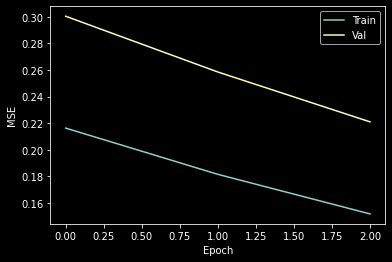

Epoch: 03 
	Train Loss: 0.152 
	 Val. Loss: 0.221 

Epoch: 02 
	Train Loss: 0.181 
	 Val. Loss: 0.258 

Epoch: 01 
	Train Loss: 0.216 
	 Val. Loss: 0.300 


After choosing the best model:
Test Loss: 0.228


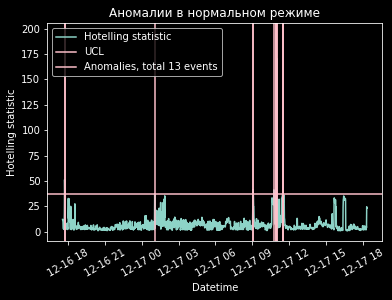

In [17]:
from tsad import main
dfs = df.copy()
a = main.AnomalyDetection()
dd = a.fit(dfs,n_epochs=3,model=lstm,encod_decode_model=True,points_ahead=1)

In [18]:
# model = SimpleLSTM(dfs.shape[1],dfs.shape[1],2,bidirectional=True).to(device)

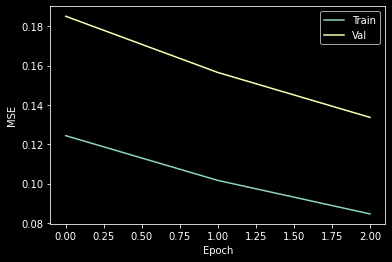

Epoch: 03 
	Train Loss: 0.085 
	 Val. Loss: 0.134 

Epoch: 02 
	Train Loss: 0.102 
	 Val. Loss: 0.156 

Epoch: 01 
	Train Loss: 0.124 
	 Val. Loss: 0.185 


After choosing the best model:
Test Loss: 0.137


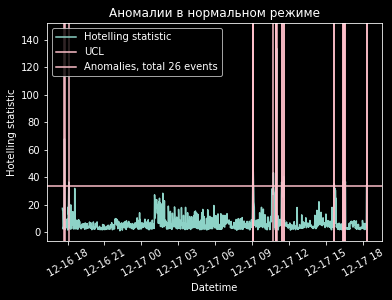

In [19]:
dd = a.fit(dfs,n_epochs=3,model=lstm,encod_decode_model=True,points_ahead=1)

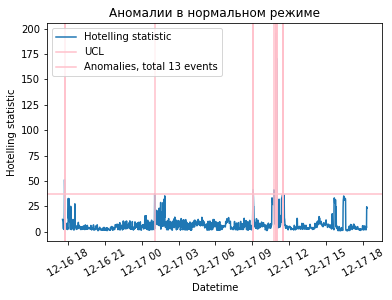

In [15]:
list_of_timestamp = a.predict_anomaly(dfs)

In [16]:
list_of_timestamp

DatetimeIndex(['2006-12-16 17:45:00', '2006-12-16 17:46:00',
               '2006-12-17 01:04:00', '2006-12-17 09:03:00',
               '2006-12-17 09:04:00', '2006-12-17 10:45:00',
               '2006-12-17 10:55:00', '2006-12-17 10:56:00',
               '2006-12-17 10:57:00', '2006-12-17 10:58:00',
               '2006-12-17 10:59:00', '2006-12-17 11:27:00',
               '2006-12-17 11:28:00'],
              dtype='datetime64[ns]', freq=None)

In [15]:
t[:,::-1,:]

ValueError: step must be greater than zero

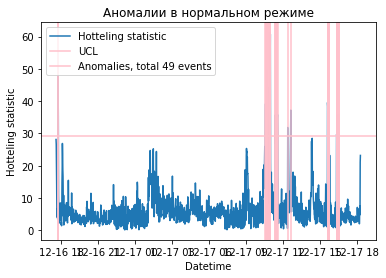

In [9]:
b= a.predict_anomaly(dfs)

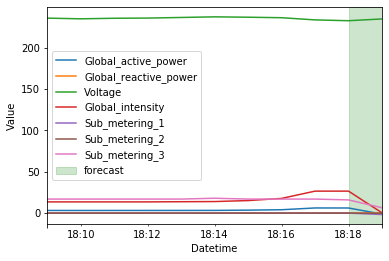

In [10]:
b= a.forecast(dfs)

In [2]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [3]:
list_files("../tsad")

tsad/
    feature_importance.py
    generate_residuals.py
    main.py
    README.md
    stastics.py
    __init__.py
    eda/
        statistics.py
        __init__.py
    evaluating/
        evaluating.py
        src.py
        univariate_funcs.py
        __init__.py
        __pycache__/
            evaluating.cpython-38.pyc
            multivariate_funcs.cpython-38.pyc
            src.cpython-38.pyc
            univariate_funcs.cpython-38.pyc
            __init__.cpython-38.pyc
    models/
        ae.py
        fit.py
        lstm.py
        __init__.py
        __pycache__/
            ae.cpython-37.pyc
            fit.cpython-37.pyc
            __init__.cpython-37.pyc
    src/
        useful.py
        __init__.py
        __pycache__/
            useful.cpython-37.pyc
            useful.cpython-38.pyc
            __init__.cpython-37.pyc
            __init__.cpython-38.pyc
    useful/
        imports.py
        iterators.py
        __init__.py
        __pycache__/
            imports.

In [4]:
from pathlib import Path

class DisplayablePath(object):
    display_filename_prefix_middle = '├──'
    display_filename_prefix_last = '└──'
    display_parent_prefix_middle = '    '
    display_parent_prefix_last = '│   '

    def __init__(self, path, parent_path, is_last):
        self.path = Path(str(path))
        self.parent = parent_path
        self.is_last = is_last
        if self.parent:
            self.depth = self.parent.depth + 1
        else:
            self.depth = 0

    @property
    def displayname(self):
        if self.path.is_dir():
            return self.path.name + '/'
        return self.path.name

    @classmethod
    def make_tree(cls, root, parent=None, is_last=False, criteria=None):
        root = Path(str(root))
        criteria = criteria or cls._default_criteria

        displayable_root = cls(root, parent, is_last)
        yield displayable_root

        children = sorted(list(path
                               for path in root.iterdir()
                               if criteria(path)),
                          key=lambda s: str(s).lower())
        count = 1
        for path in children:
            is_last = count == len(children)
            if path.is_dir():
                yield from cls.make_tree(path,
                                         parent=displayable_root,
                                         is_last=is_last,
                                         criteria=criteria)
            else:
                yield cls(path, displayable_root, is_last)
            count += 1

    @classmethod
    def _default_criteria(cls, path):
        return True

    @property
    def displayname(self):
        if self.path.is_dir():
            return self.path.name + '/'
        return self.path.name

    def displayable(self):
        if self.parent is None:
            return self.displayname

        _filename_prefix = (self.display_filename_prefix_last
                            if self.is_last
                            else self.display_filename_prefix_middle)

        parts = ['{!s} {!s}'.format(_filename_prefix,
                                    self.displayname)]

        parent = self.parent
        while parent and parent.parent is not None:
            parts.append(self.display_parent_prefix_middle
                         if parent.is_last
                         else self.display_parent_prefix_last)
            parent = parent.parent

        return ''.join(reversed(parts))

In [9]:
paths = DisplayablePath.make_tree(Path("../tsad"))
for path in paths:
    print(path.displayable())

tsad/
├── __init__.py
├── __pycache__/
│   ├── __init__.cpython-37.pyc
│   ├── __init__.cpython-38.pyc
│   ├── generate_residuals.cpython-38.pyc
│   ├── main.cpython-38.pyc
│   ├── models.cpython-38.pyc
│   ├── stastics.cpython-37.pyc
│   └── stastics.cpython-38.pyc
├── eda/
│   ├── __init__.py
│   └── statistics.py
├── evaluating/
│   ├── __init__.py
│   ├── __pycache__/
│   │   ├── __init__.cpython-38.pyc
│   │   ├── evaluating.cpython-38.pyc
│   │   ├── multivariate_funcs.cpython-38.pyc
│   │   ├── src.cpython-38.pyc
│   │   └── univariate_funcs.cpython-38.pyc
│   ├── evaluating.py
│   ├── src.py
│   └── univariate_funcs.py
├── feature_importance.py
├── generate_residuals.py
├── main.py
├── models/
│   ├── __init__.py
│   ├── __pycache__/
│   │   ├── __init__.cpython-37.pyc
│   │   ├── ae.cpython-37.pyc
│   │   └── fit.cpython-37.pyc
│   ├── ae.py
│   ├── fit.py
│   └── lstm.py
├── README.md
├── src/
│   ├── __init__.py
│   ├── __pycache__/
│   │   ├── __init__.cpython-37.pyc
│   │ 